# Imports

## Libraries

In [2]:
import pandas as pd
import numpy as np

## Data

In [3]:
PATH = "../Data/"
DF = pd.read_csv(PATH + "data_DataScientist.csv")

# EDA

## Data Dictionary

- **COUNTRY**: The country in which the items were sold
- **DEPARTMENT**: The brand or department for which the items are being sold
- **SKU**: The unique ID of a stock-keeping unit
- **DATE**: The date of the sales transaction
- **NUM_ITEMS_SOLD**: The number of items sold on a daily level

In [4]:
DF

,COUNTRY,DEPARTMENT,SKU,DATE,NUM_ITEMS_SOLD
0,C1,Dep1,SKU_1,2021-11-29,1
1,C1,Dep1,SKU_1,2021-11-30,1
2,C1,Dep1,SKU_1,2021-12-01,3
3,C1,Dep1,SKU_1,2021-12-02,2
4,C1,Dep1,SKU_1,2021-12-06,1
...,...,...,...,...,...
1910,C3,Dep2,SKU_123,2021-09-12,102
1911,C3,Dep2,SKU_124,2022-11-11,21
1912,C3,Dep1,SKU_125,2022-08-19,0
1913,C3,Dep1,SKU_126,2022-09-09,0


In [5]:
DF.dtypes

COUNTRY           object
DEPARTMENT        object
SKU               object
DATE              object
NUM_ITEMS_SOLD     int64
dtype: object

In [6]:
DF["DATE"] = pd.to_datetime(DF["DATE"])

<Axes: >

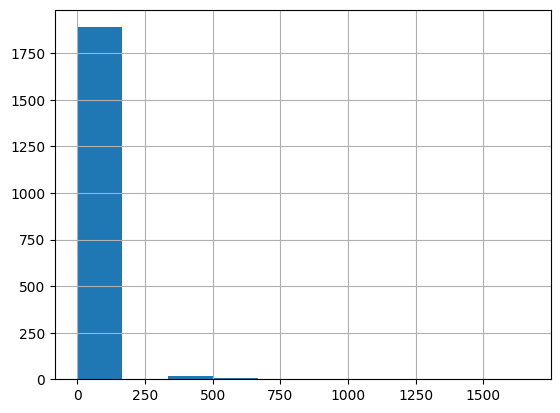

In [7]:
DF["NUM_ITEMS_SOLD"].hist()

In [8]:
DF["NUM_ITEMS_SOLD"].value_counts().sort_values(ascending=False).head(10)

NUM_ITEMS_SOLD
0    904
1    411
2    161
3     96
4     66
5     40
6     26
7     20
8     16
9     16
Name: count, dtype: int64

In [9]:
DF["DEPARTMENT"].value_counts()

DEPARTMENT
Dep1    1711
Dep2     204
Name: count, dtype: int64

In [10]:
DF.groupby(["DEPARTMENT"])["NUM_ITEMS_SOLD"].sum().sort_values(ascending=False)

DEPARTMENT
Dep2    16646
Dep1     2885
Name: NUM_ITEMS_SOLD, dtype: int64

### Check if SKUs are mutually exclusive to Department

In [11]:
A = DF.groupby(["SKU","DEPARTMENT"])["NUM_ITEMS_SOLD"].sum().unstack()
A

DEPARTMENT,Dep1,Dep2
SKU,,
SKU_1,54.0,NaN
SKU_10,16.0,NaN
SKU_100,49.0,NaN
SKU_101,15.0,NaN
SKU_102,0.0,NaN
...,...,...
SKU_95,69.0,NaN
SKU_96,25.0,NaN
SKU_97,30.0,NaN


In [61]:
(A["Dep1"] == A["Dep2"]).sum()

0

Department 1 & 2 are mutually exclusive with each other

## Checking per country's Stock Keeping Units

In [1]:
DF.groupby(["DEPARTMENT","COUNTRY"])["SKU"].count().unstack()

NameError: name 'DF' is not defined

Some countries are using the same 

In [38]:
DF.groupby(["DATE","DEPARTMENT","COUNTRY"])["NUM_ITEMS_SOLD"].sum().unstack()

COUNTRY                  C1   C2    C3
DATE       DEPARTMENT                 
2021-07-20 Dep1         1.0  NaN   NaN
2021-07-21 Dep1         2.0  NaN   NaN
2021-07-22 Dep1         0.0  NaN   NaN
2021-07-23 Dep1        13.0  NaN   NaN
2021-07-24 Dep1         0.0  NaN   NaN
...                     ...  ...   ...
2022-12-08 Dep2         NaN  NaN  29.0
2022-12-11 Dep1         3.0  0.0   NaN
           Dep2         NaN  NaN  40.0
2022-12-12 Dep1         6.0  0.0   NaN
           Dep2         NaN  NaN   0.0

[558 rows x 3 columns]

In [49]:
(DF.groupby(["DATE","DEPARTMENT","COUNTRY"])["NUM_ITEMS_SOLD"].sum().unstack().fillna(0) > 0)*1

COUNTRY                C1  C2  C3
DATE       DEPARTMENT            
2021-07-20 Dep1         1   0   0
2021-07-21 Dep1         1   0   0
2021-07-22 Dep1         0   0   0
2021-07-23 Dep1         1   0   0
2021-07-24 Dep1         0   0   0
...                    ..  ..  ..
2022-12-08 Dep2         0   0   1
2022-12-11 Dep1         1   0   0
           Dep2         0   0   1
2022-12-12 Dep1         1   0   0
           Dep2         0   0   0

[558 rows x 3 columns]

In [50]:
DF.groupby(["DATE","DEPARTMENT","SKU"])["NUM_ITEMS_SOLD"].sum().unstack().fillna(0)

SKU                    SKU_1  SKU_10  SKU_100  SKU_101  SKU_102  SKU_103  \
DATE       DEPARTMENT                                                      
2021-07-20 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
2021-07-21 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
2021-07-22 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
2021-07-23 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
2021-07-24 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
...                      ...     ...      ...      ...      ...      ...   
2022-12-08 Dep2          0.0     0.0      0.0      0.0      0.0      0.0   
2022-12-11 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
           Dep2          0.0     0.0      0.0      0.0      0.0      0.0   
2022-12-12 Dep1          0.0     0.0      0.0      0.0      0.0      0.0   
           Dep2          0.0     0.0      0.0      0.0      0.0      0.0   

SKU                    SKU_104  SKU_105  SKU_106  SKU_107  ...  SKU_90  \
DATE       DEPARTMENT                                      ...           
2021-07-20 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
2021-07-21 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
2021-07-22 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
2021-07-23 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
2021-07-24 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
...                        ...      ...      ...      ...  ...     ...   
2022-12-08 Dep2            0.0      0.0      0.0      0.0  ...     0.0   
2022-12-11 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
           Dep2            0.0      0.0      0.0      0.0  ...     0.0   
2022-12-12 Dep1            0.0      0.0      0.0      0.0  ...     0.0   
           Dep2            0.0      0.0      0.0      0.0  ...     0.0   

SKU                    SKU_91  SKU_92  SKU_93  SKU_94  SKU_95  SKU_96  SKU_97  \
DATE       DEPARTMENT                                                           
2021-07-20 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2021-07-21 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2021-07-22 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2021-07-23 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2021-07-24 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
...                       ...     ...     ...     ...     ...     ...     ...   
2022-12-08 Dep2           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-12-11 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
           Dep2           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
2022-12-12 Dep1           0.0     0.0     0.0     0.0     0.0     0.0     0.0   
           Dep2           0.0     0.0     0.0     0.0     0.0     0.0     0.0   

SKU                    SKU_98  SKU_99  
DATE       DEPARTMENT                  
2021-07-20 Dep1           0.0     0.0  
2021-07-21 Dep1           0.0     0.0  
2021-07-22 Dep1           0.0     0.0  
2021-07-23 Dep1           0.0     0.0  
2021-07-24 Dep1           0.0     0.0  
...                       ...     ...  
2022-12-08 Dep2           0.0     0.0  
2022-12-11 Dep1           0.0     0.0  
           Dep2           0.0     0.0  
2022-12-12 Dep1           0.0     0.0  
           Dep2           0.0     0.0  

[558 rows x 127 columns]